On April 10th 1912, the RMS Titanic embarked on its maiden voyage out of Southampton, UK, across the Northern Atlantic destined for New York City in the United States. Four days into its maiden voyage, the Titanic struck an iceberg roughly 375 miles south of Newfoundland. The Titanic sunk only four hours after its collision. Erroneously deemed “unsinkable”, the ship carried only 20 life boats despite carrying 2,224 passengers and crew. Claiming the lives of more than 1,500 people, the sinking of the RMS Titanic was one of the worst peacetime maritime disasters in modern history. While it is widely believed that a “women and children first” protocol
Using the Kaggle Titanic passenger data set, we can analyze passenger data from this historic disaster. In this analysis, we will explore the composition of the Kaggle Titanic data set in order to determine what factors made a passenger more likely to survive. Specifically this analysis will attempt to anser the following questions:
1. Which variables in the data set have the higest correlation to survival?
2. Was there any truth to the "women and children first" protocol?
3. Was Class playing an important role in survival rate?
4. What is the survival rate of males and females in each classes?
5. Families were saved more or people travelling alone?

# Exploratory Data Analysis
Exploring Variables The first step in exploratory data analysis is reading in the data and getting a feel for the variables. This process will give us a sense of the number of variables we are working with along with the range of values that these variables can take on.

In [1]:
# Step 1 Inport libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read the data
dt = pd.read_csv('titanic_data.csv')

In [3]:
# Description of CSV Data
dt.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning
we will dive deeper into data types later on when we take a look at some of our variables individually. Now we will want to display the data without missing values of age.

In [4]:
dt = dt[dt["Age"].isnull() == False]

Now we can see that all the important colums are filled with some or the other value 

We will also need to distinguish adult passengers from children in order to determine the validity of the "women and children first" protocol. To do this, we can create a new column in our dataframe for "ChildPass". Here, if a passenger is under the age of 16, we will identify them as a child.

In [5]:
dt['Sex'].replace(['male','female'],[0,1],inplace=True)

def child_pass(x):
    if x < 16:
        return 'Child'
    else:
        return 'Adult'
dt["ChildPass"] = pd.Series(dt["Age"].apply(child_pass), index=dt.index)
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildPass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult


Now we will study each variable individually and will clean the data

In [6]:
# from the data we can see that the valiables helpful to take us to a conclusion are sex, Age, Pclass and fare 
# Now we need to clean the data
# Start By Checking each Columns

dt["Name"].describe()
# Like Name We have to check the status for all the Fields important

print "Sex Coulumn Result:"
dt["Sex"].describe()

print "Age Coulumn Result:"
print dt["Age"].describe()

print "Fare Coulumn Result:"
print dt["Fare"].describe()

print "Pclass Coulumn Result:"
print dt["Pclass"].describe()

print "Ticket Coulumn Result:"
print dt["Ticket"].describe()

print "Embarked Coulumn Result:"
print dt["Embarked"].describe()

Sex Coulumn Result:
Age Coulumn Result:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Fare Coulumn Result:
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64
Pclass Coulumn Result:
count    714.000000
mean       2.236695
std        0.838250
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
Ticket Coulumn Result:
count        714
unique       542
top       347082
freq           7
Name: Ticket, dtype: object
Embarked Coulumn Result:
count     712
unique      3
top         S
freq      554
Name: Embarked, dtype: object


In [7]:
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildPass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,Child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,Child


# QUESTIONING PHASE: 

Once this step is done for the questionanig phase we need a corellation for whichwe can take only the important variables necessary.

1. Which variables in the data set have the higest correlation to survival?

In [8]:
#Create a function that takes a single DataFrame column as an arguement and creates a series based on on the correlation 
#between the specified column and 'Survived'
#http://stackoverflow.com/questions/19428029/how-to-get-correlation-of-two-vectors-in-python
#http://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python
def corr_to_survived(column):
    correlation = {}
    correlation = dt[column].corr(dt['Survived'])
    return pd.Series(correlation, index=[column])
   

#Apply the function to numeric columns 
pclass = corr_to_survived('Pclass')
sex = corr_to_survived('Sex')
age = corr_to_survived('Age')
sibsp = corr_to_survived('SibSp')
parch = corr_to_survived('Parch')
fare = corr_to_survived('Fare')


#Create a DataFrame to compare results
corr_list = [pclass, sex, age, sibsp, parch, fare]
correlations = pd.DataFrame(pd.concat(corr_list, axis=0), columns=['Correlation to Survival'])

#display the Dataframe
correlations

,Correlation to Survival
Pclass,-0.359653
Sex,0.538826
Age,-0.077221
SibSp,-0.017358
Parch,0.093317
Fare,0.268189


Based on the table above, we can see that "Sex" has the highest correlation to survial, followed by "Pclass" and then by "Fare". We can visualize this table through the use of the Seaborn Heatmap graph.

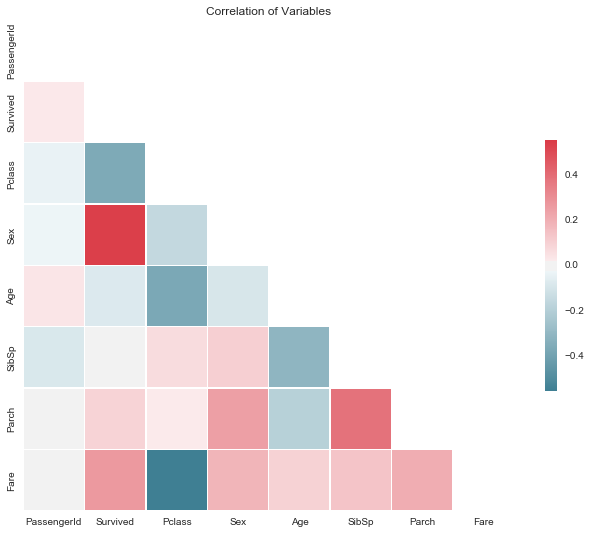

In [9]:
#Applying the result of the table to the graph to dcide the best variable 
# https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# apply the correlation to our dataframe
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax.set_title('Correlation of Variables')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

The intersection of "Sex" and "Survived" is the darkest red sqaure on our graph, indicating that the strongest correlation in our dataset is between "Sex" and "Survived".

Question 2: Was there any truth to the "women and children first" protocol?
People familiar with the Titanic disaster would probably guess that women and children made up the majority of the survivors based on the fact that the women and children first protocol has been recanted time and time again throughout the course of history. Using data analysis techniques, we are able to validate this claim. 
For that we will calculate the probability of the males and females survived.

In [10]:
# Calculating the probability of male and female survivals
menDt = dt[dt.Sex == 0]

#print menDt
menprb= menDt.Survived.mean() 
print menprb

femDt = dt[dt.Sex == 1]
femprb= femDt.Survived.mean() 
print femprb
# we can see that females survived more than males

0.205298013245
0.754789272031


As Calculated we can see tht from the total number only 20% maes were saved wheras on the other side 75% females were saved to give this a better view seabon bar graph is plotted.

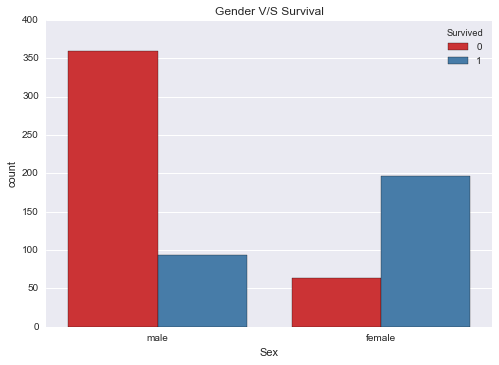

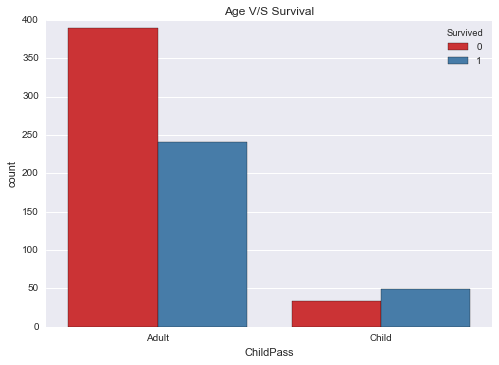

In [11]:
dt['Sex'].replace([0,1],['male','female'],inplace=True)
sns.set(style="darkgrid")
colors = ['#e41a1c','#377eb8']

sns.countplot(x="Sex",hue="Survived", data=dt, palette=colors)
plt.title('Gender V/S Survival')
sns.plt.show()

sns.countplot(x="ChildPass",hue="Survived", data=dt, palette=colors)
plt.title('Age V/S Survival')
sns.plt.show()

The Graph 1 shows that the number of non survivals by red bar and survived by blue, there we can see that in the case of females the survivals are much more than male


at the same time when we consider the child policy a high amount of child were saved which can be observed from the graphs above.

3. Was Class playing an important role in survival rate?

In [12]:
PCfDt = dt[dt.Pclass == 1]
PCsDt = dt[dt.Pclass == 2]
PCtDt = dt[dt.Pclass == 3]
fp = PCfDt.Survived.mean() 
sp = PCsDt.Survived.mean() 
tp = PCtDt.Survived.mean() 

print sp
print fp
print tp

0.479768786127
0.655913978495
0.239436619718


As shown from the above calculation the probabily of survivival is highest amongst the class 1 passengers followed by the other two classed respectively

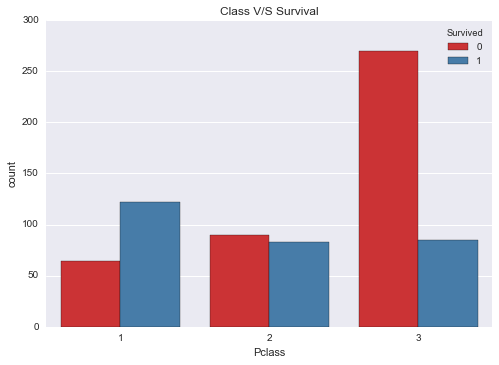

In [13]:
# Was class actually affecting the survival 
sns.set(style="darkgrid")
colors = ['#e41a1c','#377eb8']

sns.countplot(x="Pclass",hue="Survived", data=dt, palette=colors)
plt.title('Class V/S Survival')
sns.plt.show()
# Result shows that class to affected the survival rate

4. what is the survival rate of males and females on the basis of classes 

In [14]:
# same test is run over males and females but adding Pclass as another variable 
menprbclass= menDt.groupby('Pclass').Survived.mean() 
print menprbclass

#femDt = dt[dt.Sex == 1]
femprbclass= femDt.groupby('Pclass').Survived.mean() 
print femprbclass

#we can see that females of 1st class has the most survival possibility

Pclass
1    0.396040
2    0.151515
3    0.150198
Name: Survived, dtype: float64
Pclass
1    0.964706
2    0.918919
3    0.460784
Name: Survived, dtype: float64


As shown the rate of the females of class 1 and 2 are much higer than any class males or the class 3 females
5. Families were saved more or people travelling alone?

Here we will take three categores in which the person is travelling alone, there is a couple or there is family

In [15]:
PAfDt = dt[dt.Parch == 1]
PAsDt = dt[dt.Parch == 2]
PAtDt = dt[dt.Parch >= 3]

In [16]:
fAp = PAfDt.Survived.mean() 
sAp = PAsDt.Survived.mean() 
tAp = PAtDt.Survived.mean() 
print fAp
print sAp
print tAp

0.554545454545
0.573529411765
0.266666666667


As observed the persons travelling alone has a 55% chances of saving but when there is a couple the chances increases and with increases in size the survival rates decreases

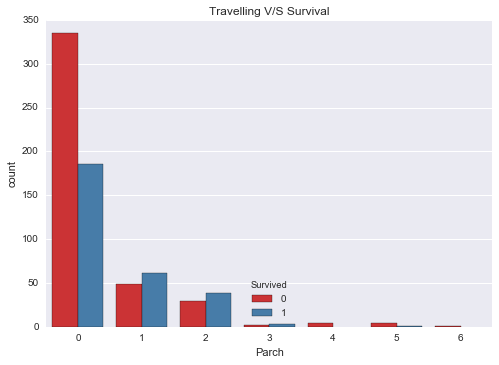

In [17]:
sns.set(style="darkgrid")
colors = ['#e41a1c','#377eb8']

sns.countplot(x="Parch",hue="Survived", data=dt, palette=colors)
plt.title('Travelling V/S Survival')
sns.plt.show()


Conclusion:
    
    Chi-squared test
In order to validate that there is a significant association between "Sex" and "Survived", we can preform a chi-squared test for independence. To preform this test in python, we can look to the scipy library for assistance.
We can state our hypothesis as follows:
H0: Gender and survival are independent. 
Ha: Gender and survival are not independent.
To check our hypothesis, we can create a square dataframe summarizing the count of surviving and perishing passengers by gender.


Chi-Square Test for Independence - http://stattrek.com/chi-square-test/independence.aspx?Tutoria

In [18]:
import scipy.stats

In [19]:
data = dt[['Sex','Survived']]

data1 = pd.crosstab(data['Sex'],data['Survived'],margins=True)
data1

Survived,0,1,All
Sex,,,
female,64,197,261
male,360,93,453
All,424,290,714


In [20]:
dataP = dt[['Pclass','Survived']]

data2 = pd.crosstab(dataP['Pclass'],dataP['Survived'],margins=True)
data2

Survived,0,1,All
Pclass,,,
1,64,122,186
2,90,83,173
3,270,85,355
All,424,290,714


In [21]:
data1i = [[81,233],[468,109]]

chi2, p, ddof, expected = scipy.stats.chi2_contingency( data1i )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format(chi2, p, ddof ))

Test Statistic: 260.717020167
p-value: 1.19735706278e-58
Degrees of Freedom: 1



In [22]:
data2i = [[81,233],[468,109]]

chi2, p, ddof, expected = scipy.stats.chi2_contingency( data2i )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print(msg.format(chi2, p, ddof ))

Test Statistic: 260.717020167
p-value: 1.19735706278e-58
Degrees of Freedom: 1



Based on the results of our test, we can see that our test statistic is much larger than our p-value, meaning that we would reject the null hypothesis and assume that a relationship between sex and survival is likely to exist.



Here firstly the titanic data was taken and then t was cleaned like the age was not having  a few values and the values were inserted and then to check the hypothesis that female were given priority while the ship was sinking was tested.
there firstly the male and female survival were individually ested and we can see that females are having a high probabily approx 74%. 

To reconfirm the system the Sex variable was applied with multiple dependent variable such as the Pclass, Age and many more and we can see that always the females probabily is more

The results of our analysis appear to show that a passenger’s gender factored significantly into their chances of survival, with class being the “runner up” survival factor. Our analysis also provides evidence to support the claim that a “women and children first” protocol was enacted at the time of the disaster.
 Most importantly, as any good data analyst will tell you, correlation does not mean causation. Just because we saw that women and children made up the majority of the survivors, that does not mean being a woman or a child automatically made you more likely to survive. As for our data itself, our records were not without missing values. To work with the age variable in our data, we needed to fill in our missing records with some value, for which the empty records were removed. This may or may not have been a prudent decision, but without complete records there is no way to validate how accurate our estimate was.